### Importation setup

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Explore Data

In [139]:
data = pd.read_csv("data.csv")

In [140]:
threshold = len(data)*0.04
print(threshold)

117.52


In [141]:
cols_to_drop = data.columns[data.isna().sum()<threshold]
print(cols_to_drop)

Index(['Unnamed: 0', 'Nation', 'Survey_Year', 'Country_Category',
       'Mortality_Adults', 'Infant_Deaths_Count', 'Expenditure_Percentage_GDP',
       'Measles_Infection_Count', 'Body_Mass_Index_Avg',
       'Polio_Vaccination_Coverage', 'Diphtheria_Vaccination_Coverage',
       'HIV_AIDS_Prevalence_Rate', 'Thinness', 'Life_Expectancy_Years'],
      dtype='object')


In [142]:
data.dropna(subset=cols_to_drop,inplace = True)

In [143]:
data.duplicated().value_counts()

False    2877
Name: count, dtype: int64

In [144]:
data.isna().sum()

Unnamed: 0                            0
Nation                                0
Survey_Year                           0
Country_Category                      0
Mortality_Adults                      0
Infant_Deaths_Count                   0
Alcohol_Consumption_Rate            173
Expenditure_Percentage_GDP            0
Hepatitis_B_Vaccination_Coverage    523
Measles_Infection_Count               0
Body_Mass_Index_Avg                   0
Polio_Vaccination_Coverage            0
Total_Health_Expenditure            210
Diphtheria_Vaccination_Coverage       0
HIV_AIDS_Prevalence_Rate              0
Gross_Domestic_Product              433
Total_Population                    643
Thinness                              0
Life_Expectancy_Years                 0
dtype: int64

In [145]:
data.head()

,Unnamed: 0,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
0,0,Syrian Arab Republic,2006.0,Developing,123.0,8,0.97,122.652333,83.0,517.0,48.5,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,73.7
1,1,Croatia,2006.0,Developed,113.0,0,11.83,1555.651986,NaN,1.0,58.1,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,75.9
2,2,Montenegro,2007.0,Developing,125.0,0,4.98,678.518894,9.0,0.0,57.2,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,74.2
3,3,Bahrain,2014.0,Developing,7.0,0,1.57,367.255674,98.0,46.0,62.9,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,76.8
4,4,Kenya,2000.0,Developing,428.0,77,1.51,0.681686,NaN,21002.0,14.4,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,51.9


In [146]:
data.rename(columns={"Unnamed: 0":"Survey_num"}, inplace= True)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Survey_num                        2877 non-null   int64  
 1   Nation                            2877 non-null   object 
 2   Survey_Year                       2877 non-null   float64
 3   Country_Category                  2877 non-null   object 
 4   Mortality_Adults                  2877 non-null   float64
 5   Infant_Deaths_Count               2877 non-null   int64  
 6   Alcohol_Consumption_Rate          2704 non-null   float64
 7   Expenditure_Percentage_GDP        2877 non-null   float64
 8   Hepatitis_B_Vaccination_Coverage  2354 non-null   float64
 9   Measles_Infection_Count           2877 non-null   float64
 10  Body_Mass_Index_Avg               2877 non-null   float64
 11  Polio_Vaccination_Coverage        2877 non-null   float64
 12  Total_Healt

In [148]:
data.describe()

,Survey_num,Survey_Year,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
count,2877.000000,2877.000000,2877.000000,2877.000000,2704.000000,2877.000000,2354.000000,2877.000000,2877.000000,2877.000000,2667.000000,2877.000000,2877.000000,2444.000000,2.234000e+03,2877.000000,2877.000000
mean,1475.584984,2007.506430,163.255822,30.381995,4.645999,751.760063,81.008071,2432.356274,38.236983,82.678485,5.928928,82.443865,1.748523,7592.218431,1.287266e+07,4.840494,69.362739
std,846.653208,4.603512,124.006701,119.107260,4.051803,2006.534135,24.995748,11542.353956,19.945058,23.348806,2.484430,23.657810,5.119095,14378.346301,6.168481e+07,4.414303,9.495396
min,0.000000,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,36.300000
25%,744.000000,2004.000000,73.000000,0.000000,0.930000,5.103249,77.000000,0.000000,19.300000,78.000000,4.270000,78.000000,0.100000,463.518942,1.938082e+05,1.600000,63.500000
50%,1476.000000,2008.000000,142.000000,3.000000,3.815000,67.672304,92.000000,17.000000,43.300000,93.000000,5.750000,93.000000,0.100000,1803.734872,1.396073e+06,3.300000,72.200000
75%,2208.000000,2011.000000,225.000000,21.000000,7.800000,456.458666,97.000000,352.000000,56.100000,97.000000,7.470000,97.000000,0.800000,6268.914399,7.420359e+06,7.200000,75.800000
max,2937.000000,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,89.000000


In [149]:
data[["Country_Category","HIV_AIDS_Prevalence_Rate","Gross_Domestic_Product","Life_Expectancy_Years"]].groupby("Country_Category").mean()

,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Life_Expectancy_Years
Country_Category,,,
Developed,0.100000,22070.638597,79.204314
Developing,2.103718,4351.430342,67.242248


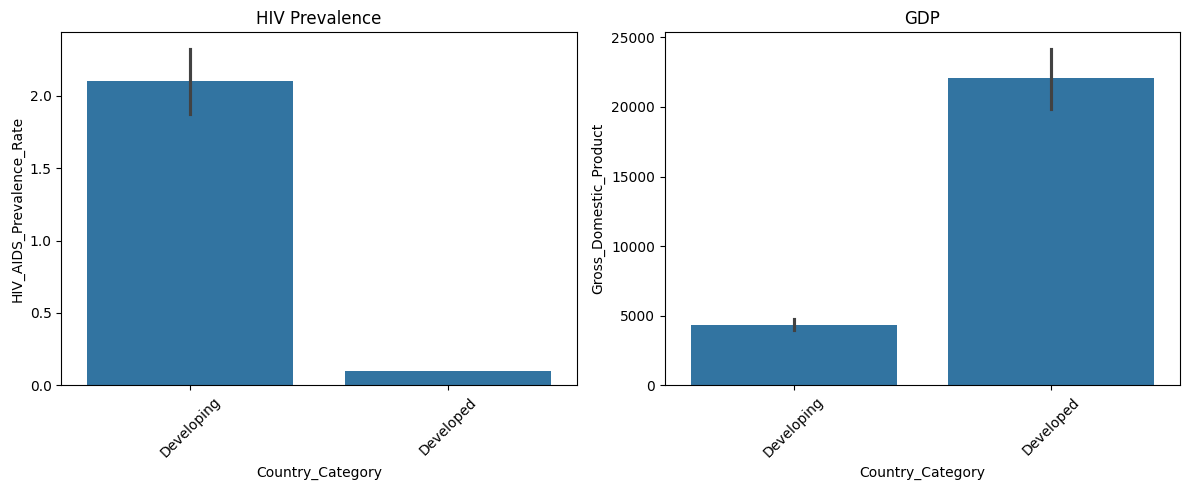

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=data, x="Country_Category", y="HIV_AIDS_Prevalence_Rate", ax=axes[0])
axes[0].set_title("HIV Prevalence")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=data, x="Country_Category", y="Gross_Domestic_Product", ax=axes[1])
axes[1].set_title("GDP")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Cleaning Data

##### clean Nation column

In [151]:
data["Nation"].dtype

dtype('O')

In [152]:
"""this column is clean"""
data["Nation"].value_counts()


Nation
Syrian Arab Republic      16
Croatia                   16
Bahrain                   16
Kenya                     16
Bosnia and Herzegovina    16
                          ..
Iraq                      15
Swaziland                 15
Bhutan                    14
Timor-Leste               14
Montenegro                10
Name: count, Length: 181, dtype: int64

#### clean Survey_Year

In [153]:
data["Survey_Year"].isna().value_counts()

Survey_Year
False    2877
Name: count, dtype: int64

In [154]:
data["Survey_Year"]= pd.to_numeric(data["Survey_Year"],errors='coerce').astype('Int64')
data["Survey_Year"].dtype

Int64Dtype()

#### clean Country_Category

In [155]:
data["Country_Category"].isna().value_counts()

Country_Category
False    2877
Name: count, dtype: int64

#### Clean Mortality_Adults column

In [156]:
data[data["Mortality_Adults"].isna()]

,Survey_num,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years


In [157]:
data[data["Mortality_Adults"]>600]

,Survey_num,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
185,185,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998.0,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,44.5
287,287,Zambia,2000,Developing,614.0,44,2.62,45.616880,NaN,30930.0,16.8,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,43.8
434,434,Zimbabwe,2000,Developing,665.0,24,1.68,0.000000,79.0,1483.0,25.5,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,46.0
687,687,Lesotho,2002,Developing,622.0,5,2.95,3.534574,NaN,0.0,25.9,84.0,6.91,84.0,32.5,47.893950,192312.0,1.6,46.4
690,690,Botswana,2004,Developing,652.0,2,4.90,469.582390,91.0,1.0,32.2,96.0,5.56,96.0,28.4,4896.583835,182933.0,1.5,48.1
837,837,Haiti,2010,Developing,682.0,23,5.76,36.292918,NaN,0.0,44.2,66.0,8.90,66.0,1.9,662.279518,9999617.0,4.0,36.3
843,843,Botswana,2001,Developing,679.0,2,5.48,306.952735,87.0,1.0,3.5,97.0,5.73,97.0,37.2,3128.977930,1754935.0,11.8,46.7
846,846,Botswana,2002,Developing,699.0,2,6.41,6.330007,88.0,7.0,31.1,97.0,6.47,97.0,34.6,355.618382,1779953.0,11.4,46.0
938,938,Zimbabwe,2008,Developing,632.0,30,3.56,20.843429,75.0,0.0,28.6,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,48.2
983,983,Lesotho,2003,Developing,648.0,5,1.99,5.300902,17.0,1.0,26.4,9.0,7.13,9.0,33.8,63.636279,191897.0,1.2,45.5


######## After verification of this column, I founded that those 
######## countries of death rate > 500 is developing countries that may happen actually 

In [158]:
data.head(1)

,Survey_num,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
0,0,Syrian Arab Republic,2006,Developing,123.0,8,0.97,122.652333,83.0,517.0,48.5,83.0,3.78,8.0,0.1,1762.24617,18914977.0,6.4,73.7


#### Clean Infant_Deaths_Count

In [159]:
data["Infant_Deaths_Count"].dtype

dtype('int64')

In [160]:
data[(data["Infant_Deaths_Count"]>300)]

,Survey_num,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
113,113,India,2009,Developing,2.0,1300,2.50,0.844186,37.0,56188.0,15.4,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,66.0
114,114,India,2005,Developing,211.0,1500,1.27,3.509637,8.0,36711.0,13.5,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,64.4
120,120,Pakistan,2007,Developing,178.0,367,0.03,3.912745,75.0,2801.0,2.1,75.0,3.35,75.0,0.1,95.432793,1.633297e+07,2.8,64.4
204,204,Pakistan,2010,Developing,172.0,372,0.04,0.667515,82.0,4321.0,21.9,82.0,3.20,82.0,0.1,14.142268,1.756182e+06,2.2,65.1
205,205,Nigeria,2004,Developing,47.0,563,9.76,57.225558,NaN,31521.0,18.8,43.0,4.33,33.0,5.4,648.815852,1.353936e+08,13.2,48.5
292,292,Pakistan,2005,Developing,2.0,364,0.04,30.593208,7.0,2981.0,18.9,78.0,2.91,77.0,0.1,711.469946,1.539967e+07,21.2,62.9
299,299,China,2003,Developing,13.0,391,2.96,122.936535,75.0,71879.0,22.6,87.0,4.82,86.0,0.1,1288.642924,1.288400e+04,5.3,73.1
307,307,Nigeria,2012,Developing,374.0,505,8.54,204.718626,42.0,6447.0,23.5,42.0,3.30,42.0,4.4,2755.297787,1.672973e+08,1.7,52.7
390,390,Nigeria,2011,Developing,375.0,513,8.75,187.573319,46.0,18843.0,22.8,48.0,3.69,48.0,4.7,2527.942300,1.628778e+07,11.0,52.3
395,395,India,2006,Developing,28.0,1500,1.37,34.859427,6.0,64185.0,13.9,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,64.8


In [161]:
# Cap values to reasonable maximum (e.g., 300 per 1000)
reasonable_max = 300  # Even 300 is extremely high
data['Infant_Deaths_Count'] = data['Infant_Deaths_Count'].clip(upper=reasonable_max)

print("After clipping:")
print(data[data['Nation'].str.contains('India', case=False, na=False)][['Survey_Year', 'Infant_Deaths_Count']])

After clipping:
      Survey_Year  Infant_Deaths_Count
113          2009                  300
114          2005                  300
395          2006                  300
416          2001                  300
604          2012                  300
606          2013                  300
785          2014                  300
1060         2011                  300
1243         2015                  300
1381         2002                  300
1495         2008                  300
1517         2007                  300
1779         2000                  300
1803         2003                  300
2395         2004                  300
2463         2010                  300


In [162]:
data["Infant_Deaths_Count"].max()

np.int64(300)

##### Clean Alcohol_Consumption_Rate column

In [163]:
data["Alcohol_Consumption_Rate"].max()

np.float64(17.87)

In [164]:
data["Alcohol_Consumption_Rate"].min()

np.float64(0.01)

In [165]:
data[(data["Alcohol_Consumption_Rate"]>15)]

,Survey_num,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
56,56,Lithuania,2012,Developed,176.0,0,15.14,1807.071336,93.0,0.0,6.9,93.0,6.67,93.0,0.1,14341.836000,2987773.0,2.7,73.0
483,483,Estonia,2007,Developing,189.0,0,17.87,1904.124690,95.0,1.0,56.3,95.0,5.16,95.0,0.1,16586.452000,13468.0,2.0,73.0
1145,1145,Estonia,2008,Developing,167.0,0,16.99,225.072362,94.0,0.0,56.7,95.0,6.60,95.0,0.1,1894.548500,13379.0,2.0,74.2
1851,1851,Lithuania,2013,Developed,178.0,0,15.04,1968.816817,93.0,35.0,61.4,93.0,6.59,93.0,0.1,15712.823760,2957689.0,2.7,73.0
1859,1859,Estonia,2006,Developing,188.0,0,16.58,244.351080,95.0,27.0,55.9,95.0,5.10,95.0,0.1,12595.416500,134681.0,2.1,73.0
1975,1975,Belarus,2012,Developing,194.0,0,16.35,91.709621,97.0,10.0,6.5,98.0,5.10,98.0,0.1,694.243915,9464495.0,2.0,71.9
2007,2007,Lithuania,2014,Developed,169.0,0,15.19,2211.744178,94.0,11.0,61.9,93.0,6.55,93.0,0.1,16554.971390,2932367.0,2.6,73.4
2118,2118,Belarus,2011,Developing,232.0,0,17.31,846.911307,98.0,50.0,59.9,98.0,4.92,98.0,0.1,6519.717530,9473172.0,2.0,72.0
2431,2431,Estonia,2009,Developing,156.0,0,15.04,1717.088711,95.0,0.0,57.1,95.0,6.93,95.0,0.1,14726.318280,1334515.0,2.0,74.9
2540,2540,Estonia,2005,Developing,189.0,0,15.52,153.504526,95.0,2.0,55.5,96.0,5.20,96.0,0.1,1338.313220,1354775.0,2.1,72.8


In [166]:
data["Alcohol_Consumption_Rate"].isna().sum()

np.int64(173)

##### Clean Expenditure_Percentage_GDP column

In [167]:
data["Expenditure_Percentage_GDP"].dtype

dtype('float64')

In [168]:
data.loc[0:100, ['Nation', 'Expenditure_Percentage_GDP']]


,Nation,Expenditure_Percentage_GDP
0,Syrian Arab Republic,122.652333
1,Croatia,1555.651986
2,Montenegro,678.518894
3,Bahrain,367.255674
4,Kenya,0.681686
...,...,...
96,Slovakia,0.000000
97,Egypt,0.000000
98,Guyana,493.327929
99,Myanmar,2.511437


In [169]:
if 'Gross_Domestic_Product' in data.columns:
    print("Attempting to convert dollar amounts to percentages...")
    

    mask = (data['Expenditure_Percentage_GDP'] > 20) & (data['Gross_Domestic_Product'].notna())
    
    if mask.any():
        data.loc[mask, 'Expenditure_Percentage_GDP'] = (
            data.loc[mask, 'Expenditure_Percentage_GDP'] / 
            data.loc[mask, 'Gross_Domestic_Product']
        ) * 100
        
        print(f"Converted {mask.sum()} rows from dollars to percentages")
        print(f"New range: {data['Expenditure_Percentage_GDP'].min():.2f}% to {data['Expenditure_Percentage_GDP'].max():.2f}%")
    else:
        print("Cannot convert - missing GDP data for dollar amount rows")

Attempting to convert dollar amounts to percentages...
Converted 1896 rows from dollars to percentages
New range: 0.00% to 34.41%


In [170]:
data.columns

Index(['Survey_num', 'Nation', 'Survey_Year', 'Country_Category',
       'Mortality_Adults', 'Infant_Deaths_Count', 'Alcohol_Consumption_Rate',
       'Expenditure_Percentage_GDP', 'Hepatitis_B_Vaccination_Coverage',
       'Measles_Infection_Count', 'Body_Mass_Index_Avg',
       'Polio_Vaccination_Coverage', 'Total_Health_Expenditure',
       'Diphtheria_Vaccination_Coverage', 'HIV_AIDS_Prevalence_Rate',
       'Gross_Domestic_Product', 'Total_Population', 'Thinness',
       'Life_Expectancy_Years'],
      dtype='object')

##### clean Hepatitis_B_Vaccination_Coverage

In [171]:
data['Hepatitis_B_Vaccination_Coverage'].isna().value_counts()

Hepatitis_B_Vaccination_Coverage
False    2354
True      523
Name: count, dtype: int64

In [172]:
(data["Hepatitis_B_Vaccination_Coverage"]<30).value_counts()

Hepatitis_B_Vaccination_Coverage
False    2684
True      193
Name: count, dtype: int64

In [173]:
data['Polio_Vaccination_Coverage'].isna().value_counts()

Polio_Vaccination_Coverage
False    2877
Name: count, dtype: int64

In [174]:
(data['Polio_Vaccination_Coverage']<30).value_counts()

Polio_Vaccination_Coverage
False    2702
True      175
Name: count, dtype: int64

In [175]:
data['Diphtheria_Vaccination_Coverage'].isna().value_counts()

Diphtheria_Vaccination_Coverage
False    2877
Name: count, dtype: int64

In [176]:
# Find rows where HepB is null but Polio and Diphtheria have values
null_hepb = data[
    data['Hepatitis_B_Vaccination_Coverage'].notna() & 
    data['Polio_Vaccination_Coverage'].notna() & 
    data['Diphtheria_Vaccination_Coverage'].notna()
]

print(f"Found {len(null_hepb)} rows where Hepatitis B is null but other vaccinations have values")
print(null_hepb[['Nation', 'Survey_Year', 
                 'Hepatitis_B_Vaccination_Coverage', 
                 'Polio_Vaccination_Coverage', 
                 'Diphtheria_Vaccination_Coverage']])

Found 2354 rows where Hepatitis B is null but other vaccinations have values
                    Nation  Survey_Year  Hepatitis_B_Vaccination_Coverage  \
0     Syrian Arab Republic         2006                              83.0   
2               Montenegro         2007                               9.0   
3                  Bahrain         2014                              98.0   
5                     Chad         2008                              17.0   
6          Solomon Islands         2005                              83.0   
...                    ...          ...                               ...   
2932           Saint Lucia         2014                              99.0   
2933                 Malta         2011                              82.0   
2934         Guinea-Bissau         2010                              83.0   
2936                 Italy         2003                              95.0   
2937               Eritrea         2005                              96.0   

##### Clean Measles_Infection_Count Column

In [177]:
(data[data['Measles_Infection_Count']>200])

,Survey_num,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
0,0,Syrian Arab Republic,2006,Developing,123.0,8,0.97,6.960000,83.0,517.0,48.5,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,73.7
4,4,Kenya,2000,Developing,428.0,77,1.51,0.681686,NaN,21002.0,14.4,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,51.9
8,8,Bosnia and Herzegovina,2014,Developing,89.0,0,4.03,14.110000,89.0,3000.0,55.3,86.0,9.57,86.0,0.1,5193.949320,35662.0,2.4,77.2
10,10,Cameroon,2000,Developing,394.0,62,3.91,4.720594,NaN,14629.0,2.9,57.0,4.48,62.0,7.7,68.414399,15274234.0,7.7,51.4
16,16,Madagascar,2000,Developing,283.0,44,1.16,14.500000,NaN,35256.0,13.9,58.0,5.80,57.0,0.6,245.939659,1576686.0,8.7,57.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,2919,Spain,2007,Developed,72.0,2,11.05,15.580000,96.0,267.0,61.7,96.0,8.36,96.0,0.1,3279.414000,4522683.0,0.6,89.0
2922,2922,Somalia,2001,Developing,352.0,46,0.01,0.000000,NaN,3571.0,18.2,33.0,NaN,33.0,0.8,NaN,NaN,7.9,57.0
2926,2926,Zambia,2002,Developing,69.0,41,2.44,14.330000,NaN,25036.0,17.3,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,45.5
2927,2927,Russian Federation,2015,Developing,222.0,13,NaN,0.000000,97.0,843.0,6.5,97.0,NaN,97.0,0.1,9329.298351,1449687.0,2.3,75.0


##### clean Body Mass column

In [178]:
(data[data['Body_Mass_Index_Avg']>40])

,Survey_num,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
0,0,Syrian Arab Republic,2006,Developing,123.0,8,0.97,6.96,83.0,517.0,48.5,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,73.7
1,1,Croatia,2006,Developed,113.0,0,11.83,13.69,NaN,1.0,58.1,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,75.9
2,2,Montenegro,2007,Developing,125.0,0,4.98,11.39,9.0,0.0,57.2,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,74.2
3,3,Bahrain,2014,Developing,7.0,0,1.57,1.47,98.0,46.0,62.9,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,76.8
6,6,Solomon Islands,2005,Developing,24.0,0,0.90,28.48,83.0,0.0,42.1,9.0,7.83,89.0,0.1,88.874858,469885.0,1.3,67.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2925,Austria,2013,Developed,68.0,0,11.82,16.33,95.0,0.0,56.6,95.0,11.14,95.0,0.1,554.715320,8479375.0,1.8,81.1
2930,2930,Iraq,2011,Developing,144.0,32,0.17,4.87,77.0,15.0,56.5,8.0,3.32,79.0,0.1,5854.614497,3172753.0,5.3,77.0
2932,2932,Saint Lucia,2014,Developing,139.0,0,9.97,0.00,99.0,0.0,46.7,99.0,6.72,99.0,0.1,NaN,NaN,4.3,75.0
2933,2933,Malta,2011,Developed,59.0,0,6.91,15.78,82.0,3.0,68.0,96.0,9.60,96.0,0.1,22821.847000,416268.0,0.8,87.0


In [179]:
test_sample = data[data['Body_Mass_Index_Avg'] > 40].copy()
print("TEST - What happens if we divide >60 by 2:")
print("=" * 50)

for idx, row in test_sample.iterrows():
    original = row['Body_Mass_Index_Avg']
    corrected = original / 2
    print(f"{row['Nation']:25} : {original:6.1f} → {corrected:5.1f}")

data.loc[data['Body_Mass_Index_Avg'] > 40, 'Body_Mass_Index_Avg'] /= 2

TEST - What happens if we divide >60 by 2:
Syrian Arab Republic      :   48.5 →  24.2
Croatia                   :   58.1 →  29.1
Montenegro                :   57.2 →  28.6
Bahrain                   :   62.9 →  31.4
Solomon Islands           :   42.1 →  21.1
Bosnia and Herzegovina    :   55.3 →  27.6
Uzbekistan                :   43.0 →  21.5
Haiti                     :   43.0 →  21.5
Germany                   :   57.1 →  28.6
Dominican Republic        :   43.1 →  21.6
Norway                    :   54.0 →  27.0
Netherlands               :   55.0 →  27.5
New Zealand               :   65.3 →  32.6
Nicaragua                 :   49.4 →  24.7
Micronesia (Federated States of) :   62.0 →  31.0
Dominican Republic        :   47.2 →  23.6
Nicaragua                 :   53.2 →  26.6
Georgia                   :   49.9 →  24.9
Bosnia and Herzegovina    :   49.9 →  24.9
Honduras                  :   42.0 →  21.0
Luxembourg                :   55.8 →  27.9
Tonga                     :   65.5 →  32.8
Jord

In [180]:
data[data['Body_Mass_Index_Avg']<10]

,Survey_num,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
7,7,Peru,2008,Developing,138.0,11,4.85,13.640000,93.0,1.0,5.8,93.0,4.73,93.0,0.3,428.878110,2864198.0,1.2,73.9
10,10,Cameroon,2000,Developing,394.0,62,3.91,4.720594,NaN,14629.0,2.9,57.0,4.48,62.0,7.7,68.414399,15274234.0,7.7,51.4
24,24,Belize,2015,Developing,175.0,0,NaN,0.000000,94.0,0.0,5.9,94.0,NaN,94.0,0.2,4849.997495,359288.0,3.5,71.0
28,28,Norway,2013,Developed,62.0,0,6.21,18.180000,NaN,8.0,6.3,94.0,9.39,94.0,0.1,1291.435000,579623.0,0.8,81.5
30,30,Philippines,2005,Developing,223.0,65,4.22,8.850000,49.0,118.0,2.1,9.0,3.91,89.0,0.1,1194.697155,86274237.0,1.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,2895,Croatia,2010,Developed,16.0,0,12.10,15.260000,97.0,7.0,6.6,97.0,8.25,97.0,0.1,1355.745860,4417781.0,1.6,76.6
2900,2900,China,2013,Developing,88.0,185,5.79,9.955532,99.0,26883.0,3.9,99.0,5.39,99.0,0.1,777.775940,135738.0,3.8,75.6
2927,2927,Russian Federation,2015,Developing,222.0,13,NaN,0.000000,97.0,843.0,6.5,97.0,NaN,97.0,0.1,9329.298351,1449687.0,2.3,75.0
2929,2929,Bosnia and Herzegovina,2005,Developing,12.0,0,4.56,1.540000,93.0,23.0,5.5,95.0,8.50,93.0,0.1,2968.411860,378153.0,2.9,75.0


### filling null values in columns

#### fill null in Hepatitis-B-Vacination

In [181]:
from sklearn.impute import KNNImputer

vaccine_cols = ['Hepatitis_B_Vaccination_Coverage', 
                'Polio_Vaccination_Coverage', 
                'Diphtheria_Vaccination_Coverage']


data_for_impute = data[vaccine_cols].copy()

# Count missing before
missing_before = data_for_impute['Hepatitis_B_Vaccination_Coverage'].isna().sum()
print(f"Missing Hepatitis B values before: {missing_before}")

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')

imputed_array = imputer.fit_transform(data_for_impute)


imputed_df = pd.DataFrame(imputed_array, columns=vaccine_cols, index=data.index)


data['Hepatitis_B_Vaccination_Coverage'] = imputed_df['Hepatitis_B_Vaccination_Coverage']


Missing Hepatitis B values before: 523


#### filling Alcohol-conumition

In [182]:

data_sorted = data.sort_values(['Nation', 'Survey_Year'])

# Forward fill within each country group
data['Alcohol_Consumption_Rate'] = (
    data_sorted.groupby('Nation')['Alcohol_Consumption_Rate']
    .ffill()  # Forward fill from previous years
)

# Count filled values
filled_count = data['Alcohol_Consumption_Rate'].isna().sum() - data_sorted['Alcohol_Consumption_Rate'].isna().sum()

In [183]:
data[(data['Survey_Year']==2015)]

,Survey_num,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
11,11,Côte d'Ivoire,2015,Developing,397.0,57,0.01,0.0,83.0,65.0,28.00,81.0,NaN,83.0,1.9,NaN,NaN,5.5,53.3
24,24,Belize,2015,Developing,175.0,0,6.58,0.0,94.0,0.0,5.90,94.0,NaN,94.0,0.2,4849.997495,359288.0,3.5,71.0
26,26,Sierra Leone,2015,Developing,413.0,22,0.01,0.0,86.0,607.0,24.40,86.0,NaN,86.0,0.5,587.538233,723725.0,7.4,51.0
74,74,Mozambique,2015,Developing,355.0,60,0.01,0.0,8.0,79.0,22.60,8.0,NaN,8.0,3.9,528.312560,281691.0,3.6,57.6
93,93,Montenegro,2015,Developing,16.0,0,0.01,0.0,82.0,0.0,30.90,89.0,NaN,89.0,0.1,6461.192554,622159.0,1.8,76.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,2812,Malawi,2015,Developing,365.0,26,0.01,0.0,88.0,0.0,19.60,88.0,NaN,88.0,4.8,362.657544,1757367.0,6.4,58.3
2827,2827,Namibia,2015,Developing,248.0,2,0.01,0.0,92.0,212.0,35.70,92.0,NaN,92.0,2.1,4737.669960,2425561.0,8.2,65.8
2834,2834,Lithuania,2015,Developed,165.0,0,15.19,0.0,94.0,50.0,31.20,93.0,NaN,93.0,0.1,14252.428530,29491.0,2.6,73.6
2842,2842,Antigua and Barbuda,2015,Developing,13.0,0,8.56,0.0,99.0,0.0,23.85,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,76.4


#### fill in total health column

In [184]:
from sklearn.impute import KNNImputer

strong_columns = [
    'Gross_Domestic_Product',     
    'Life_Expectancy_Years', 
    'Infant_Deaths_Count'    
]

impute_data = data[['Total_Health_Expenditure'] + strong_columns].copy()

imputer = KNNImputer(n_neighbors=3)
imputed_array = imputer.fit_transform(impute_data)

data['Total_Health_Expenditure'] = imputed_array[:, 0]



##### fill GDP column

In [185]:

data['Gross_Domestic_Product'] = (
    data.sort_values(['Nation', 'Survey_Year'])
    .groupby('Nation')['Gross_Domestic_Product']
    .apply(lambda x: x.ffill().bfill() if x.isna().any() else x)
    .reset_index(level=0, drop=True)
    .reindex(data.index)
)


##### fill Total population

In [186]:
data[data['Total_Population'].isna()]

,Survey_num,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
3,3,Bahrain,2014,Developing,7.0,0,1.57,1.47,98.0,46.0,31.45,98.0,4.980000,98.0,0.1,24983.379200,NaN,6.1,76.8
11,11,Côte d'Ivoire,2015,Developing,397.0,57,0.01,0.00,83.0,65.0,28.00,81.0,5.263333,83.0,1.9,NaN,NaN,5.5,53.3
21,21,New Zealand,2011,Developed,72.0,0,9.47,21.71,95.0,597.0,32.65,95.0,11.240000,95.0,0.1,38426.558100,NaN,0.3,86.0
23,23,Micronesia (Federated States of),2001,Developing,183.0,0,2.82,0.00,81.0,0.0,31.00,79.0,8.580000,75.0,0.1,NaN,NaN,0.3,67.2
42,42,United Arab Emirates,2004,Developing,95.0,1,1.77,8.22,92.0,22.0,28.50,94.0,2.460000,94.0,0.1,36161.176100,NaN,5.2,75.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2910,Yemen,2001,Developing,251.0,46,0.08,0.00,19.0,485.0,31.70,73.0,4.340000,73.0,0.1,NaN,NaN,14.0,61.1
2916,2916,Singapore,2004,Developed,71.0,0,1.45,7.44,94.0,96.0,29.90,95.0,3.170000,95.0,0.1,2745.271360,NaN,2.1,79.7
2921,2921,Libya,2006,Developing,134.0,2,0.01,5.28,98.0,1.0,28.35,98.0,2.510000,98.0,0.1,9344.987518,NaN,5.5,72.2
2922,2922,Somalia,2001,Developing,352.0,46,0.01,0.00,50.2,3571.0,18.20,33.0,5.266667,33.0,0.8,47.543235,NaN,7.9,57.0


In [187]:
data = data.sort_values(['Nation', 'Survey_Year'])

data['Total_Population'] = data.groupby('Nation')['Total_Population'].ffill()

data['Total_Population'] = data.groupby('Nation')['Total_Population'].bfill()

data = data.sort_index()


#### correlation between the columns itself

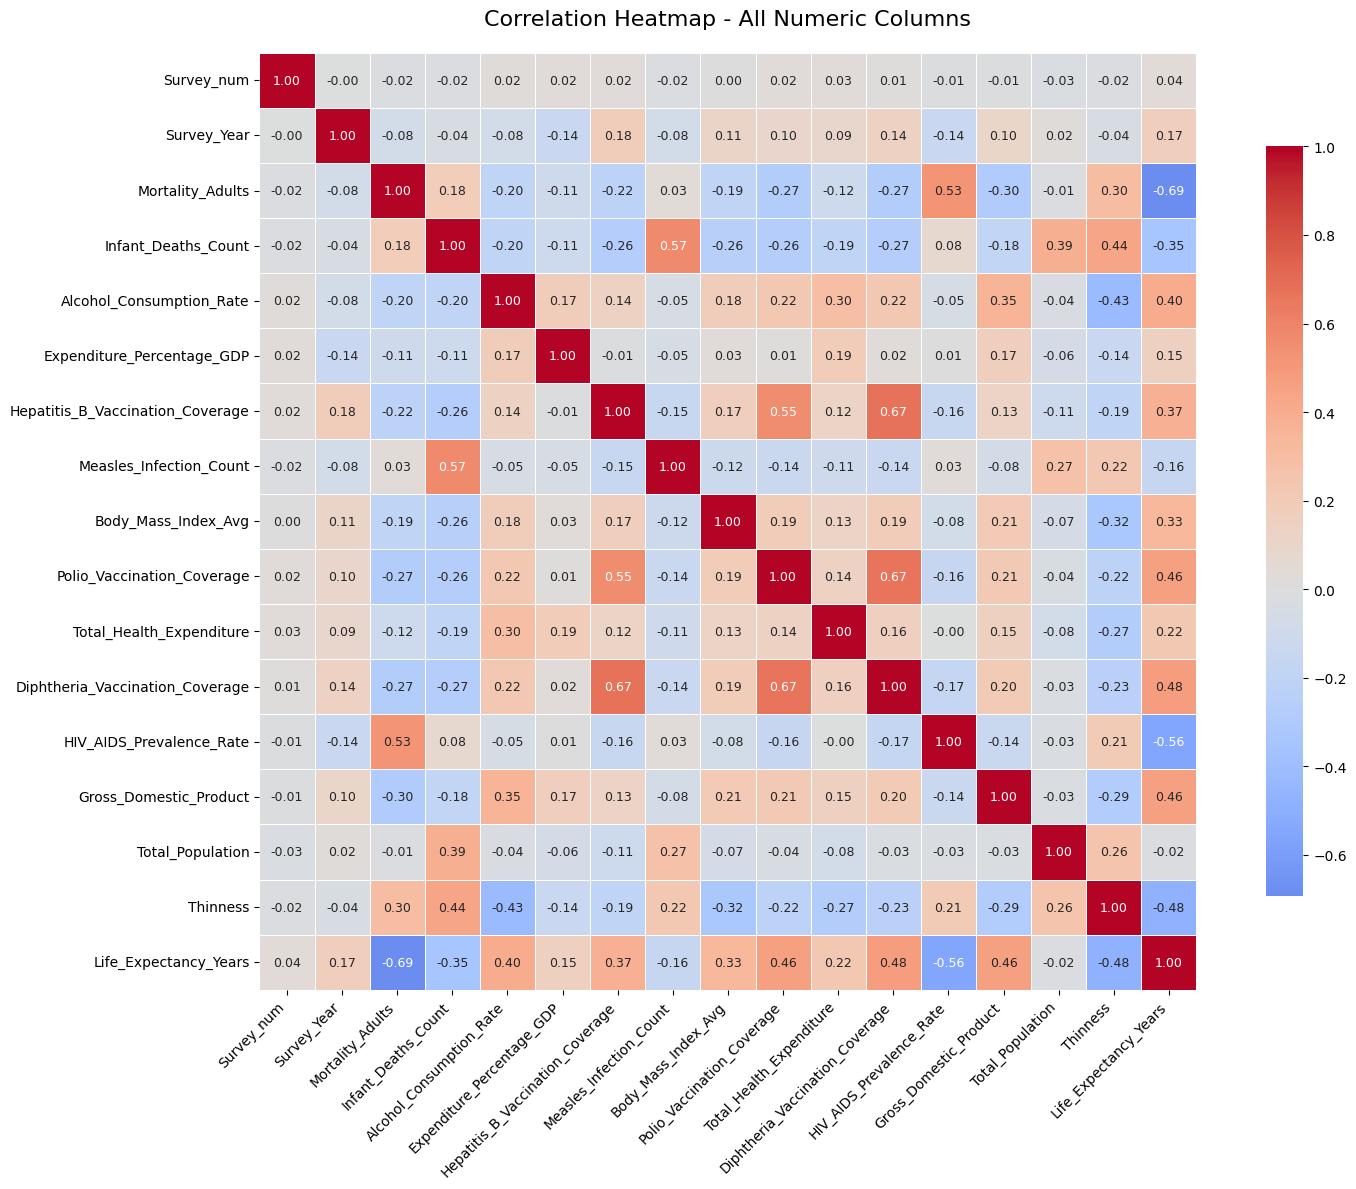

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate correlation matrix for all numeric columns
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": 0.8},
            linewidths=0.5,
            annot_kws={'size': 9})

plt.title('Correlation Heatmap - All Numeric Columns', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()